In [32]:
%pip install pypdf2 pandas pymupdf opencv-python pdf2image pdfplumber matplotlib pillow pytesseract

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from PyPDF2 import PdfReader
import os
import fitz 
import pandas as pd
import pdfplumber
import csv
import matplotlib.pyplot as plt
import numpy as np
import pytesseract
from PIL import Image

In [ ]:
#Extraire le texte du fichier 

pdf_file = "fichier1.pdf"
reader = PdfReader(pdf_file)
text = "\n".join([page.extract_text() for page in reader.pages if page.extract_text()])
print(text)

In [23]:
#Extraire le Les images du fichier 

dossier_images = "images"
os.makedirs(dossier_images, exist_ok=True)

open_f = fitz.open(pdf_file)

for i, page in enumerate(open_f):
    for img in page.get_images():
        xref = img[0]
        try:
            pix = fitz.Pixmap(open_f, xref)
            if pix.n - pix.alpha > 3:  
                pix = fitz.Pixmap(fitz.csRGB, pix)
            ext = "png" if not pix.colorspace or pix.colorspace.n <= 3 else "jpg"
            pix.save(f"{dossier_images}/img{xref}.{ext}")
            
        except Exception as e:
            print(f"Erreur avec l'image {xref} de la page {i}: {str(e)}")
        finally:
            if 'pix' in locals():
                pix = None



In [24]:
#Extaire tout les tableaux de mon fichier et les sauvegarder dans un fichier csv
dossier_tableaux = "tableaux"

os.makedirs(dossier_tableaux, exist_ok=True)

# Ouvre le PDF
with pdfplumber.open(pdf_file) as pdf:
    table_count = 0
    for page_number, page in enumerate(pdf.pages, start=1):
        tables = page.extract_tables()
        for table in tables:
            table_count += 1
            csv_filename = os.path.join(dossier_tableaux, f"tableau_{page_number}_{table_count}.csv")
            with open(csv_filename, "w", newline="", encoding="utf-8") as f:
                writer = csv.writer(f)
                for row in table:
                    writer.writerow(row)

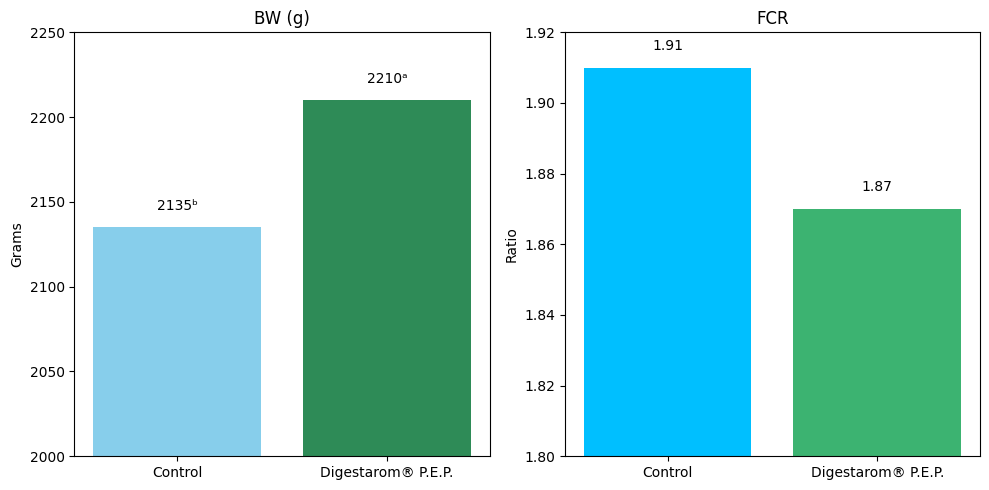

In [50]:
# Données pour BW (Body Weight)
labels = ['Control', 'Digestarom® P.E.P.']
bw_values = [2135, 2210]

# Données pour FCR (Feed Conversion Ratio)
fcr_values = [1.91, 1.87]

# Création des sous-graphes côte à côte
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Diagramme pour BW
axs[0].bar(labels, bw_values, color=['skyblue', 'seagreen'])
axs[0].set_title('BW (g)')
axs[0].set_ylim(2000, 2250)
axs[0].text(0, bw_values[0] + 10, '2135ᵇ', ha='center')
axs[0].text(1, bw_values[1] + 10, '2210ᵃ', ha='center')

# Diagramme pour FCR
axs[1].bar(labels, fcr_values, color=['deepskyblue', 'mediumseagreen'])
axs[1].set_title('FCR')
axs[1].set_ylim(1.80, 1.92)
axs[1].text(0, fcr_values[0] + 0.005, '1.91', ha='center')
axs[1].text(1, fcr_values[1] + 0.005, '1.87', ha='center')

# Titres des axes Y
axs[0].set_ylabel('Grams')
axs[1].set_ylabel('Ratio')

# Affichage
plt.tight_layout()
plt.show()


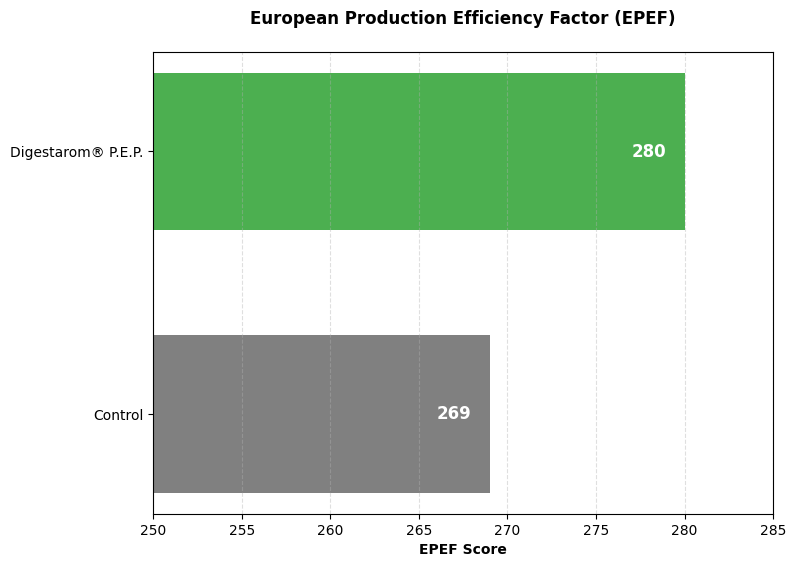

In [51]:
import matplotlib.pyplot as plt

# Données
groups = ["Control", "Digestarom® P.E.P."]
epef = [269, 280]

# Configuration du graphique en barres horizontales
plt.figure(figsize=(8, 6))
plt.barh(groups, epef, color=["#808080", "#4CAF50"], height=0.6)
plt.title("European Production Efficiency Factor (EPEF)", fontweight="bold", pad=20)
plt.xlabel("EPEF Score", fontweight="bold")
plt.xlim(250, 285)

# Ajout des valeurs sur les barres
for i, score in enumerate(epef):
    plt.text(score - 3, i, f"{score}", va="center", color="white", fontsize=12, fontweight="bold")

plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.show()